EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES
https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles


<span style="font-size:15px">

# About Dataset
Welcome to the Employee Salaries for Different Job Roles Dataset! This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. Whether you're an HR analyst, data scientist, or someone interested in understanding salary trends, this dataset offers a wealth of information to explore and analyze.

## Content:

The dataset contains the following fields:

work_year: The year of employment.

experience_level: The experience level of the employee (e.g., entry-level, mid-level, senior).

employment_type: The type of employment (e.g., full-time, part-time, contract).

job_title: The job title or position of the employee within the company.

salary: The salary amount in the local currency.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount in USD (United States Dollars).

employee_residence: The location of the employee's residence.

remote_ratio: The percentage of remote work allowed for the position.

company_location: The location of the company.

company_size: The size of the company (e.g., small, medium, large).

## Usage:

This dataset can be utilized for various purposes, including but not limited to:

Analyzing salary trends across different job titles and experience levels.
Investigating the impact of remote work on compensation.
Comparing salary levels between full-time and part-time employment.
Understanding the correlation between company size and employee salaries.
Predictive analysis for forecasting salaries based on experience and job roles.
We encourage you to explore the data, perform insightful analyses, and share your findings with the Kaggle community. If you find any interesting patterns or make significant discoveries, don't forget to acknowledge this dataset in your work.

Please note that all data has been anonymized to ensure the privacy and confidentiality of individuals and organizations.

We hope you find this dataset valuable for your research and analysis. Happy exploring!
</span>

## Load the Data
Virtual Environment copied from homl3

In [3]:
from zipfile import ZipFile
with ZipFile('archive.zip', 'r') as f:
    f.extractall()

## Explore the Data

In [21]:
import pandas as pd

salary = pd.read_csv('ds_salaries.csv')
# salary.columns.values[0] = "index" #names the first column index
# added in csv file instead
salary.head()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [16]:
# extra code – code to save the figures as high-res PNGs
from pathlib import Path

IMAGES_PATH = Path() / "images" / "employeeSalary"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

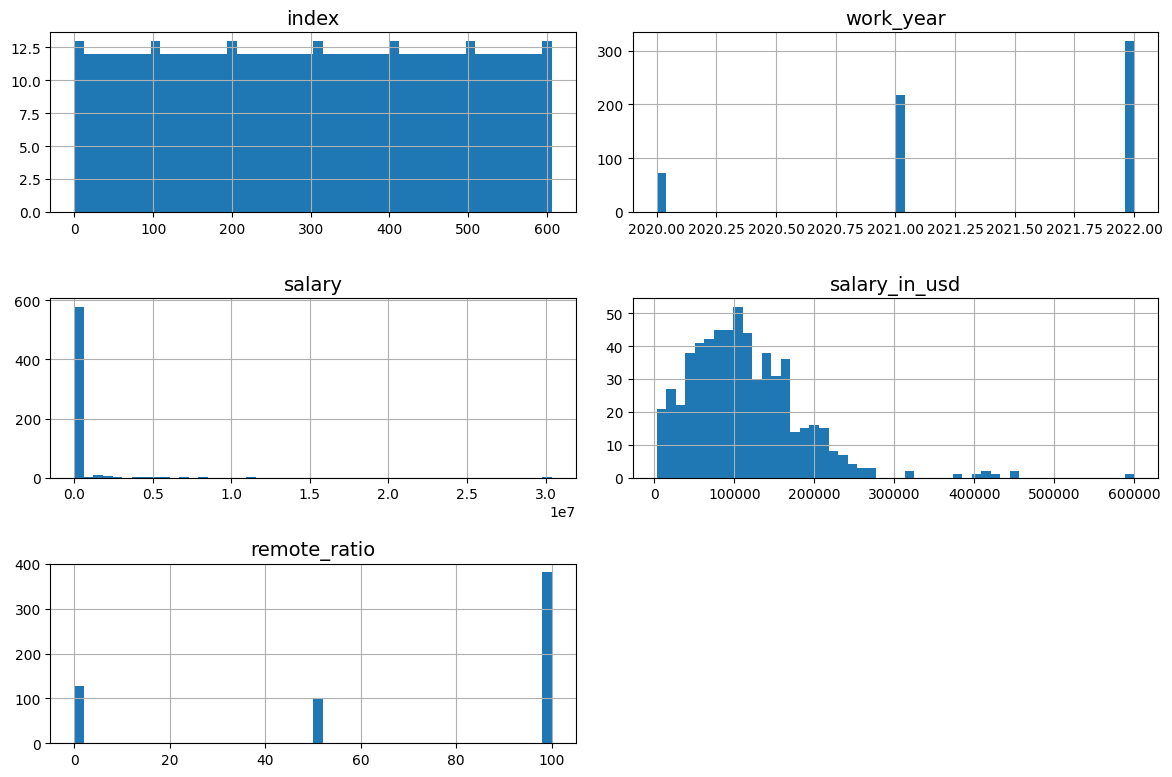

In [17]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

salary.hist(bins=50, figsize=(12, 8)) #This just does all automatically cool
save_fig("attribute_histogram_plots")  # extra code
plt.show()

## Create a Test Set
We will do this by using the Scikit-learn train_test_split method

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(salary, test_size=0.2, random_state=42)

## Data Cleaning
1. work_year - needs to be a value that denotes how many years from the current one

2. experience_level - convert to a dummy variable ordinally (experience matters)
3. employement_type - convert to a dummy variable categorically (FT, PT, contract treat as equal?)
4. job_title - can be used as a cluster variable
5. salary - // 
6. salary_currency - //
7. salary_in_usd - THIS IS THE OUTCOME (I want to get a model that will predict salary in USD given the other things)
8. employee_residence - Another cluster variable
9. remote ratio - convert to a dummy variable categorically
10. company location - Cluster Variable (maybe doesnt matter?)
11. company_size - categorical variable


In [ ]:
salary["experience_level"].value_counts() #SE, MI, EN, EX


experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64